In [37]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Read the electricity data (assuming it is a CSV file with two columns: datetime and electricity)
path=sys.path[0].replace("figures", "data")
path=os.path.join(path, r"UCSD_raw_data\Price_SDGE.csv")
df = pd.read_csv(path)
df

,Date,price,zone
0,1/1/2019 12:00:00 AM,44.34993,SDGE
1,1/1/2019 1:00:00 AM,42.80696,SDGE
2,1/1/2019 2:00:00 AM,41.60521,SDGE
3,1/1/2019 3:00:00 AM,40.59222,SDGE
4,1/1/2019 4:00:00 AM,41.63747,SDGE
...,...,...,...
9499,1/31/2020 7:00:00 PM,39.68972,SDGE
9500,1/31/2020 8:00:00 PM,35.00000,SDGE
9501,1/31/2020 9:00:00 PM,33.50011,SDGE
9502,1/31/2020 10:00:00 PM,28.54000,SDGE


In [38]:

#df['time_n'] = pd.to_datetime(df['Date'],format='%m/%d/%Y %H:%M:%S %p').dt.time
df['time_n'] = pd.to_datetime(df['Date'],format='%m/%d/%Y %H:%M:%S %p').dt.time
#df['time_n'] =pd.to_datetime(df['Date'],format='%m/%d/%Y %H:%M:%S %P').dt.strftime('%H:%M:%S')
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y %H:%M:%S %p')
df['day'] = df['Date'].apply(lambda x:x.strftime('%Y-%m-%d'))
#df.set_index("time_n",inplace=True)
df_group=df.drop(columns=['Date','zone']).groupby(['day'])

a=df_group.get_group("2019-08-01")
#a['index']=a.index.astype(int)
b=a.copy(deep=True)
b.reset_index(drop=False)
b.index=b.index-b.index[0]
b

,price,time_n,day
0,29.91236,12:00:00,2019-08-01
1,29.37269,01:00:00,2019-08-01
2,28.58609,02:00:00,2019-08-01
3,28.08106,03:00:00,2019-08-01
4,28.84241,04:00:00,2019-08-01
5,32.46358,05:00:00,2019-08-01
6,34.45484,06:00:00,2019-08-01
7,30.86277,07:00:00,2019-08-01
8,27.83547,08:00:00,2019-08-01
9,27.12282,09:00:00,2019-08-01


In [39]:
key_list=[]
key_g=df_group.groups.keys()
for i in key_g:
    key_list.append(i)

0     33.383207
1     31.400281
2     29.919273
3     29.784157
4     31.618154
5     37.717833
6     44.378617
7     39.235097
8     31.064869
9     26.001028
10    24.741536
11    23.783193
12    23.662648
13    24.939831
14    27.078410
15    31.302327
16    38.028598
17    52.016762
18    59.989106
19    64.179457
20    54.822800
21    46.947354
22    40.331817
23    35.863708
Name: price, dtype: float64


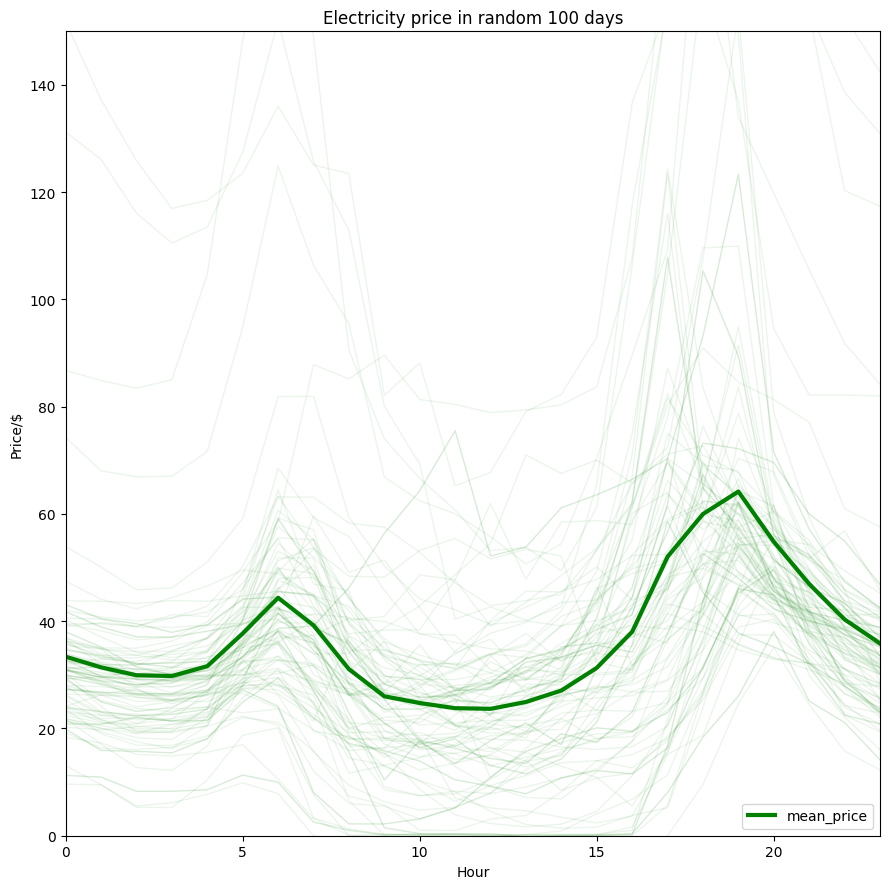

In [47]:
import random
import numpy as np
range_list=[i for i in range(len(key_list))]
n=100
rnd=random.choices(population=range_list,k=n)

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 9]
#plt.rcParams["dpi"] = [600]
plt.rcParams["figure.autolayout"] = True
sum=np.zeros(24)
overlapping = 0.08
for i in rnd:
    a=df_group.get_group(key_list[i]).copy(deep=True)
    a.index=a.index-a.index[0]
    a.reset_index(drop=True)
    sum=sum+a['price']
    a['index']=a.index.astype(int)
    plt.plot(a['index'],a['price'], c='green', alpha=overlapping,lw=1)
plt.plot(sum/n,c='green', alpha=1,lw=3,label="mean_price")
plt.legend(loc='best')
plt.title('Electricity price in random {} days'.format(n))
plt.xlabel('Hour')
plt.ylabel('Price/$')
plt.ylim(0,150)
plt.xlim(0,23)

plt.savefig('price_description_rnd_{}.png'.format(n),dpi=600)

print(sum/n)

In [46]:
import random
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 9]
#plt.rcParams["dpi"] = [600]
plt.rcParams["figure.autolayout"] = True
hour_price =np.array(
    [0.152, 0.143, 0.137, 0.137, 0.145, 0.172, 0.204, 0.185, 0.144, 0.123, 0.113, 0.109,
        0.110, 0.116, 0.127, 0.148, 0.181, 0.244, 0.279, 0.294, 0.249, 0.213, 0.181, 0.163])
overlapping = 0.05

plt.plot(hour_price,c='green', alpha=1,lw=3,label="normalized_price")
plt.legend(loc='best')
#plt.title('Electricity price in random {} days'.format(n))
plt.xlabel('Hour')
plt.ylabel('Price/$')
plt.ylim(0,0.5)
plt.xlim(0,23)
plt.savefig('represent_price.png',dpi=600)
plt.close("all")

0     35.469144
1     33.352729
2     31.987820
3     31.861631
4     33.790773
5     39.824509
6     47.380598
7     43.393379
8     34.233832
9     29.266198
10    26.420666
11    26.297624
12    26.669702
13    27.594190
14    30.714637
15    35.642128
16    44.118878
17    58.831343
18    66.704638
19    69.101701
20    57.046008
21    49.039440
22    41.955765
23    38.026941
24          NaN
Name: price, dtype: float64


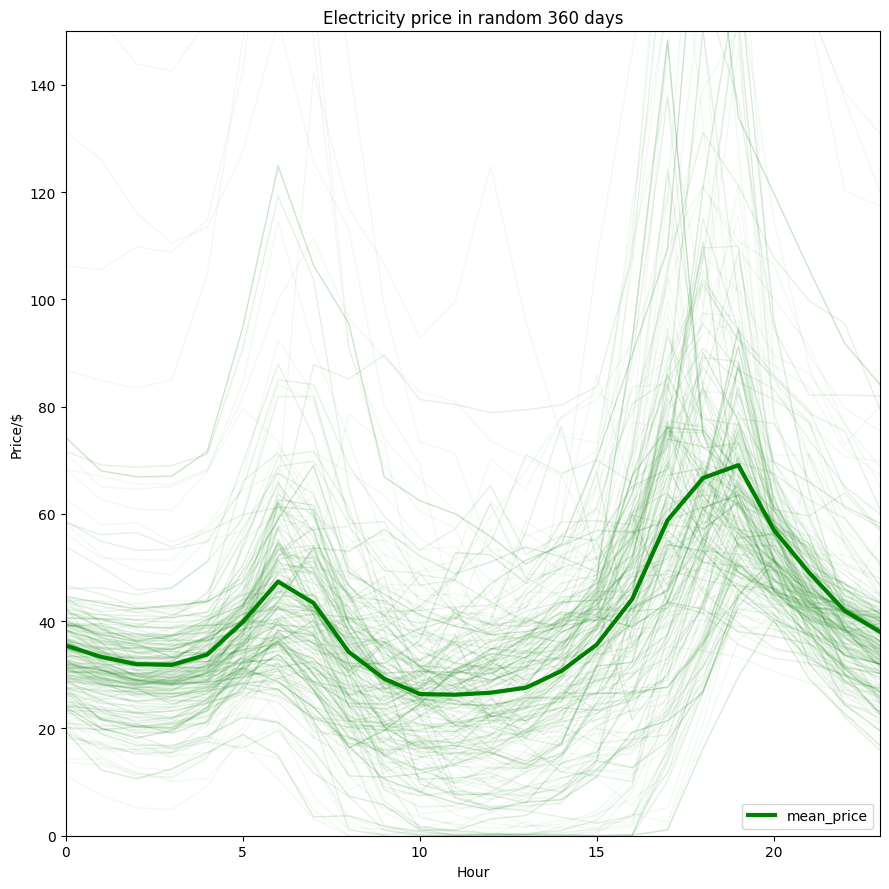

In [45]:
import random
import numpy as np
range_list=[i for i in range(len(key_list))]
n=360
rnd=random.choices(population=range_list,k=n)

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 9]
#plt.rcParams["dpi"] = [600]
plt.rcParams["figure.autolayout"] = True
sum=np.zeros(24)
overlapping = 0.05
for i in rnd:
    a=df_group.get_group(key_list[i]).copy(deep=True)
    a.index=a.index-a.index[0]
    a.reset_index(drop=True)
    sum=sum+a['price']
    a['index']=a.index.astype(int)
    plt.plot(a['index'],a['price'], c='green', alpha=overlapping,lw=1)
plt.plot(sum/n,c='green', alpha=1,lw=3,label="mean_price")
plt.legend(loc='best')
plt.title('Electricity price in random {} days'.format(n))
plt.xlabel('Hour')
plt.ylabel('Price/$')
plt.ylim(0,150)
plt.xlim(0,23)

plt.savefig('price_description_rnd_{}.png'.format(n),dpi=600)

print(sum/n)